In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [35]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
#Number of mice:
merge_df["Mouse ID"].nunique()

249

In [37]:
#Dataframe for mice/timepoint:
duplicate_df = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID:
merge_df = merge_df[merge_df["Mouse ID"]!="g989"]
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame.
len(merge_df['Mouse ID'].unique())

248

In [40]:
#Summary Statistics:

#Table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = merge_df.groupby("Drug Regimen")
tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_stdev = regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = regimen_df["Tumor Volume (mm3)"].sem()

#Summaries:
summary_df = pd.DataFrame([tumor_mean,tumor_median,tumor_var,tumor_stdev,tumor_SEM]).T
summary_df.columns = ["Tumor Volume Mean",
                      "Tumor Volume Median",
                      "Tumor Volume Variance",
                      "Tumor Volume Std. Dev.",
                      "Tumor Volume Std. Err."]
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Groupby by merging
merge_df.groupby("Drug Regimen").agg(aggregations)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [42]:
#Bar Plots:

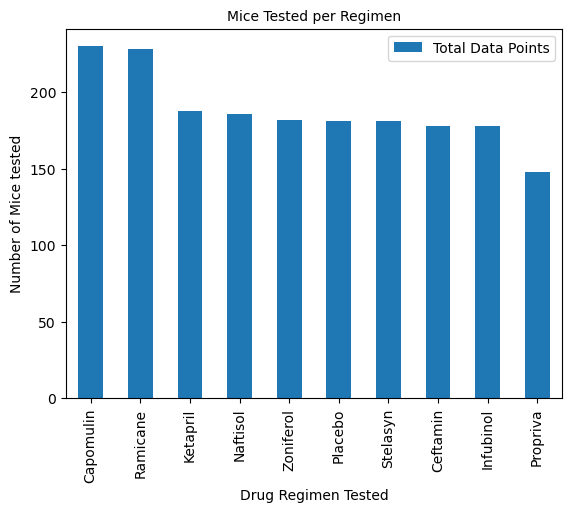

In [54]:
# Total number of data points for each treatment throughout the course of the study:
total_datapoints = regimen_df["Drug Regimen"].count()
total_datapoints_df = pd.DataFrame(total_datapoints)
total_datapoints_df.columns = ["Total Data Points"]
#Bar GRAPH:
total_datapoints_plot = total_datapoints_df.sort_values("Total Data Points", ascending = False).plot(kind="bar")
total_datapoints_plot.set_xlabel("Drug Regimen Tested")
total_datapoints_plot.set_ylabel("Number of Mice tested")
plt.title("Mice Tested per Regimen", fontsize = 10)
plt.show()

In [58]:
#Bar Chart:

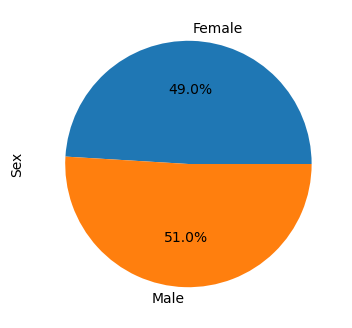

In [60]:
#Pie plot showing the distribution of female v.s male mice:
gender_df = merge_df.groupby("Sex")
gender_count = gender_df["Sex"].count()
gender_plot = gender_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=10, figsize=(4, 4))

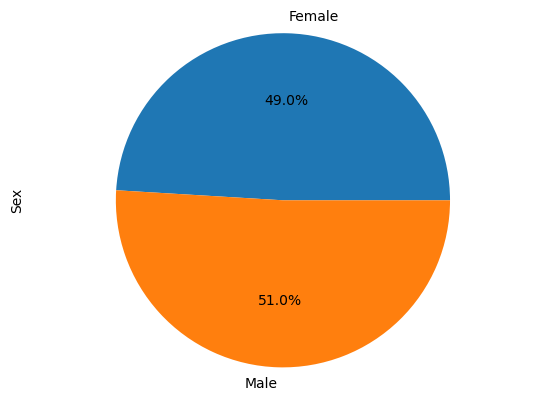

In [61]:
#Pie plot showing the distribution of female v.s male mice:
labels = ["Female", "Male"]
count = [gender_count["Female"],gender_count["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

In [63]:
#Quartiles:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#last (greatest) timepoint for each mouse:
last_timepoint = merge_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, merge_df, on = ["Mouse ID","Timepoint"])
tumor_volume_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [66]:
# Put treatments into a list for for loop:
# Create empty list to fill with tumor volume data:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

In [67]:
for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])

In [68]:
# Put four tumor vol lists into a list for for loop:
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]

In [69]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Th

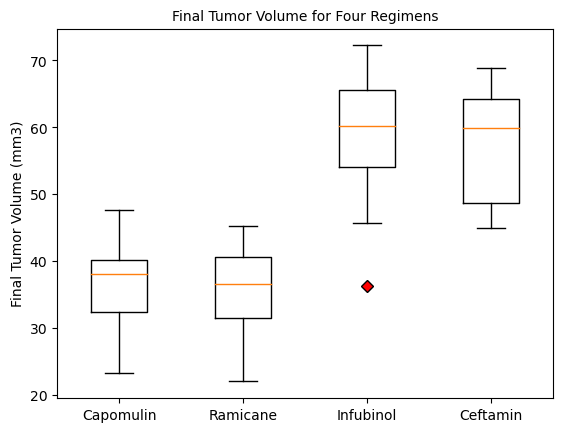

In [72]:
#Bar Plot
red_diamond = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops = red_diamond)
ax1.set_title("Final Tumor Volume for Four Regimens", fontsize = 10)
ax1.set_xticklabels(treatments)
plt.show()

In [ ]:
#Line Chart:

In [74]:
#Find Capomulin (g316)
tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"].head()
g316_tumor = merge_df.loc[merge_df["Mouse ID"]=="g316"]
g316_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


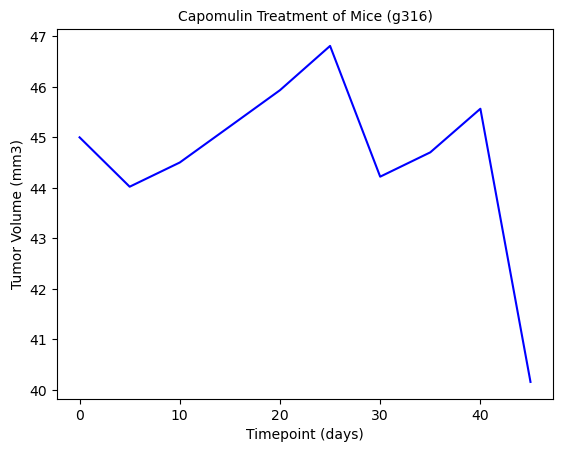

In [76]:
plt.plot(g316_tumor["Timepoint"],g316_tumor["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mice (g316)", fontsize = 10)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

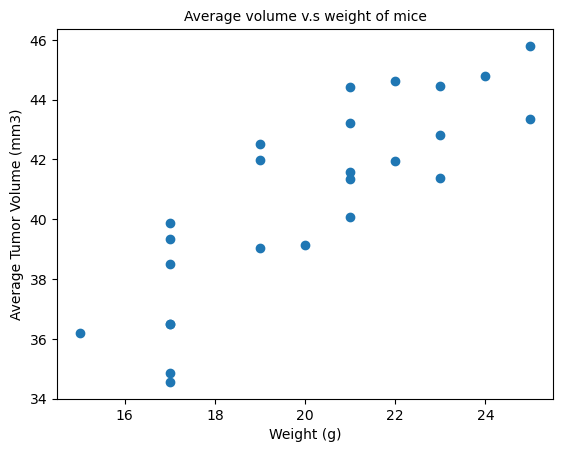

In [87]:
#Scattor Plot of mice weight versus average tumor volume
capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average volume v.s weight of mice", fontsize = 10)
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84.


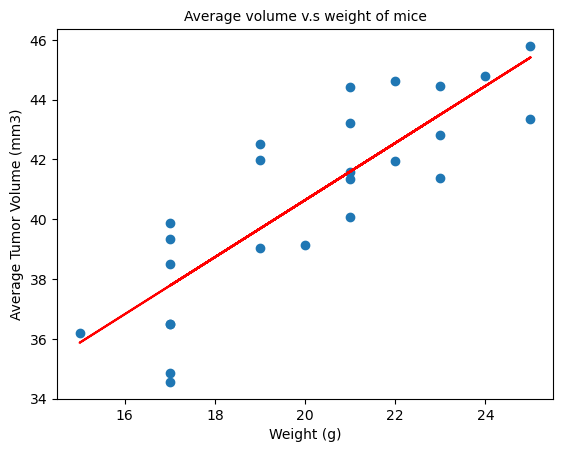

In [90]:
#Correlation coefficient and linear regression model:
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
#Linear Equation: 
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.title("Average volume v.s weight of mice", fontsize = 10)
plt.show()

In [ ]:
#There is indeed a correlation between mice weight and tumor. Tumor increases as the mice's weight does.